In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/2019/01/30/gabriel-fluffy-iglesias-one-show-fits-all-transcript/',
        'https://scrapsfromtheloft.com/2018/11/21/trevor-noah-son-of-patricia-transcript/',]

# Comedian names
comedians = ['gabriel', 'trevor']

In [ ]:

 #Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2019/01/30/gabriel-fluffy-iglesias-one-show-fits-all-transcript/
https://scrapsfromtheloft.com/2018/11/21/trevor-noah-son-of-patricia-transcript/


In [ ]:

# # Pickle files for later use

# # Make a new directory to hold the text files
# !mkdir transcripts

for i, c in enumerate(comedians):
    with open("/content" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("/content" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['gabriel', 'trevor'])

In [ ]:
# More checks
data['trevor'][:1]

['A NETFLIX ORIGINAL COMEDY SPECIAL [distant traffic] LIVE NATION PRESENTS TREVOR NOAH']

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:

# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
gabriel,"[crowd chanting] Fluffy! Fluffy! [Fluffy shouts] Houston! [crowd cheering] [audience] Five, four, three, two, one! [cheering]\n♪ Macho, macho man ..."
trevor,"A NETFLIX ORIGINAL COMEDY SPECIAL [distant traffic] LIVE NATION PRESENTS TREVOR NOAH [presenter] Beautiful people, put your hands together for Tre..."


In [ ]:
data_df.transcript.loc['gabriel']

"[crowd chanting] Fluffy!\xa0Fluffy! [Fluffy shouts] Houston! [crowd cheering] [audience] Five, four, three, two, one! [cheering]\n♪ Macho, macho man\xa0♪\n♪ I’ve got to be a macho man\xa0♪\n♪ Macho, macho man ♪\n♪ I’ve got to be a macho! ♪\n♪ Macho, macho man\xa0♪\n♪ I’ve got to be a macho man\xa0♪\n♪ Macho, macho man ♪\n♪ I’ve got to be a macho! ♪ How are you? [crowd roars] [Fluffy] Whoo! Oh, man! That’s a long walk. [laughter] Thank you so much, Houston. [crowd cheering] One year ago, this city was flipped upside down by a hurricane, un cabrón named Harvey. [laughter] And they said that this city would never be the same. I think it’s beautiful that, a year later, we’re all here celebrating together the fact that this city is resilient. And you guys persevered. Houston’s strong, baby. [crowd cheering, applauding] That’s serious. In all sincerity, guys, I’m not trying to kiss your ass. I already got your money. [laughter] Freaking Houston. I love this town. I’ve been coming here for 2

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('♪', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0','', text)
    text = re.sub('“','', text)
    text = re.sub('”','', text)
    return text

round = lambda x: clean_text_round(x)


In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round))
data_clean

,transcript
gabriel,fluffyfluffy houston five four three two one macho macho man i’ve got to be a macho man macho macho man i’ve got to be a macho macho macho ...
trevor,a netflix original comedy special live nation presents trevor noah beautiful people put your hands together for trevor noah what’s going on l...


In [ ]:
data_clean.transcript.loc['gabriel']

' fluffyfluffy  houston   five four three two one  macho macho man i’ve got to be a macho man macho macho man  i’ve got to be a macho  macho macho man i’ve got to be a macho man macho macho man  i’ve got to be a macho  how are you   whoo oh man that’s a long walk  thank you so much houston  one year ago this city was flipped upside down by a hurricane un cabrón named harvey  and they said that this city would never be the same i think it’s beautiful that a year later we’re all here celebrating together the fact that this city is resilient and you guys persevered houston’s strong baby  that’s serious in all sincerity guys i’m not trying to kiss your ass i already got your money  freaking houston i love this town i’ve been coming here for  years twenty years started off performing at a comedy club called the last stop  and then of course we jumped over to the improv and then– i performed everywhere i even did a onenighter in tomball  that’s a long story for the people at home i won’t eve

In [ ]:
data_df

,transcript
gabriel,"[crowd chanting] Fluffy! Fluffy! [Fluffy shouts] Houston! [crowd cheering] [audience] Five, four, three, two, one! [cheering]\n♪ Macho, macho man ..."
trevor,"A NETFLIX ORIGINAL COMEDY SPECIAL [distant traffic] LIVE NATION PRESENTS TREVOR NOAH [presenter] Beautiful people, put your hands together for Tre..."


In [ ]:
# Let's add the comedians' full names as well
full_names = ['Gabriel Iglesias', 'Trevor Noah']

data_df['full_name'] = full_names
data_df

,transcript,full_name
gabriel,"[crowd chanting] Fluffy! Fluffy! [Fluffy shouts] Houston! [crowd cheering] [audience] Five, four, three, two, one! [cheering]\n♪ Macho, macho man ...",Gabriel Iglesias
trevor,"A NETFLIX ORIGINAL COMEDY SPECIAL [distant traffic] LIVE NATION PRESENTS TREVOR NOAH [presenter] Beautiful people, put your hands together for Tre...",Trevor Noah


In [ ]:
data_clean['full_name'] = full_names
data_clean

,transcript,polarity,subjectivity,full_name
gabriel,fluffyfluffy houston five four three two one macho macho man i’ve got to be a macho man macho macho man i’ve got to be a macho macho macho ...,0.137038,0.484957,Gabriel Iglesias
trevor,a netflix original comedy special live nation presents trevor noah beautiful people put your hands together for trevor noah what’s going on l...,0.098991,0.476838,Trevor Noah


In [ ]:

# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandoned,able,absolutely,accent,accept,accommodating,according,accountability,acommotion,aconversation,acouple,acting,action,activates,acts,actual,actually,adamant,addition,address,addressed,administration,admit,adult,adventure,afraid,africa,african,africans,afuera,age,agent,agentspromoters,ago,agree,agreed,aguy,ah,ahead,ahí,...,wordsthat,work,worked,working,works,world,worldout,worried,worries,worry,worst,worth,wouldn,wound,wow,wrapped,write,written,wrong,wrote,xenophobic,xhosa,ya,yanks,yeah,year,years,yell,yells,yes,yo,yogurt,yoohoo,york,youfrontrow,youknow,young,youtube,és,órale
gabriel,0,1,2,1,0,0,2,0,1,1,1,0,1,1,0,2,4,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,10,0,1,1,3,1,1,...,1,13,1,2,4,6,1,1,1,2,0,0,6,1,1,0,1,1,2,0,0,0,1,0,30,6,16,2,3,11,8,0,1,0,1,1,1,1,1,3
trevor,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,4,1,0,0,1,1,2,0,0,8,12,2,4,0,1,0,0,0,2,0,0,2,1,0,...,0,4,1,0,4,6,0,1,0,3,3,2,4,0,3,1,0,0,3,1,1,4,0,1,44,2,2,0,0,4,8,1,0,3,0,0,0,0,0,0


In [ ]:
import pandas as pd

data = data_dtm
data = data.transpose()
data.head()

,gabriel,trevor
abandoned,0,1
able,1,0
absolutely,2,0
accent,1,0
accept,0,1


In [ ]:
#top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'gabriel': [('like', 119),
  ('know', 81),
  ('don', 55),
  ('just', 53),
  ('said', 50),
  ('right', 49),
  ('snoop', 45),
  ('going', 43),
  ('mom', 43),
  ('got', 41),
  ('okay', 38),
  ('people', 38),
  ('oh', 37),
  ('son', 31),
  ('yeah', 30),
  ('want', 29),
  ('ll', 27),
  ('tell', 26),
  ('hey', 25),
  ('frankie', 24),
  ('ve', 24),
  ('let', 23),
  ('say', 23),
  ('guys', 22),
  ('time', 22),
  ('man', 21),
  ('room', 20),
  ('door', 20),
  ('hear', 19),
  ('vicente', 19)],
 'trevor': [('like', 203),
  ('know', 101),
  ('don', 73),
  ('just', 68),
  ('said', 62),
  ('snake', 59),
  ('people', 49),
  ('tacos', 48),
  ('man', 48),
  ('ve', 47),
  ('going', 47),
  ('yeah', 44),
  ('right', 44),
  ('time', 35),
  ('want', 33),
  ('got', 30),
  ('ll', 30),
  ('thing', 29),
  ('didn', 28),
  ('think', 25),
  ('trevor', 24),
  ('oh', 23),
  ('food', 22),
  ('wall', 22),
  ('love', 21),
  ('thank', 20),
  ('mom', 19),
  ('guy', 19),
  ('really', 19),
  ('nigga', 18)]}

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

gabriel
like, know, don, just, said, right, snoop, going, mom, got, okay, people, oh, son
---
trevor
like, know, don, just, said, snake, people, tacos, man, ve, going, yeah, right, time
---


In [ ]:

# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'know',
 'don',
 'just',
 'said',
 'right',
 'snoop',
 'going',
 'mom',
 'got',
 'okay',
 'people',
 'oh',
 'son',
 'yeah',
 'want',
 'll',
 'tell',
 'hey',
 'frankie',
 've',
 'let',
 'say',
 'guys',
 'time',
 'man',
 'room',
 'door',
 'hear',
 'vicente',
 'like',
 'know',
 'don',
 'just',
 'said',
 'snake',
 'people',
 'tacos',
 'man',
 've',
 'going',
 'yeah',
 'right',
 'time',
 'want',
 'got',
 'll',
 'thing',
 'didn',
 'think',
 'trevor',
 'oh',
 'food',
 'wall',
 'love',
 'thank',
 'mom',
 'guy',
 'really',
 'nigga']

In [ ]:

# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 2),
 ('know', 2),
 ('don', 2),
 ('just', 2),
 ('said', 2),
 ('right', 2),
 ('going', 2),
 ('mom', 2),
 ('got', 2),
 ('people', 2),
 ('oh', 2),
 ('yeah', 2),
 ('want', 2),
 ('ll', 2),
 ('ve', 2),
 ('time', 2),
 ('man', 2),
 ('snoop', 1),
 ('okay', 1),
 ('son', 1),
 ('tell', 1),
 ('hey', 1),
 ('frankie', 1),
 ('let', 1),
 ('say', 1),
 ('guys', 1),
 ('room', 1),
 ('door', 1),
 ('hear', 1),
 ('vicente', 1),
 ('snake', 1),
 ('tacos', 1),
 ('thing', 1),
 ('didn', 1),
 ('think', 1),
 ('trevor', 1),
 ('food', 1),
 ('wall', 1),
 ('love', 1),
 ('thank', 1),
 ('guy', 1),
 ('really', 1),
 ('nigga', 1)]

In [ ]:

# If both the comedians have same word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count == 2]
add_stop_words

['like',
 'know',
 'don',
 'just',
 'said',
 'right',
 'going',
 'mom',
 'got',
 'people',
 'oh',
 'yeah',
 'want',
 'll',
 've',
 'time',
 'man']

In [ ]:
data

,gabriel,trevor
abandoned,0,1
able,1,0
absolutely,2,0
accent,1,0
accept,0,1
...,...,...
youknow,1,0
young,1,0
youtube,1,0
és,1,0


In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
data_stop

,abandoned,able,absolutely,accent,accept,accommodating,according,accountability,acommotion,aconversation,acouple,acting,action,activates,acts,actual,actually,adamant,addition,address,addressed,administration,admit,adult,adventure,afraid,africa,african,africans,afuera,age,agent,agentspromoters,ago,agree,agreed,aguy,ah,ahead,ahí,...,words,wordsthat,work,worked,working,works,world,worldout,worried,worries,worry,worst,worth,wouldn,wound,wow,wrapped,write,written,wrong,wrote,xenophobic,xhosa,ya,yanks,year,years,yell,yells,yes,yo,yogurt,yoohoo,york,youfrontrow,youknow,young,youtube,és,órale
gabriel,0,1,2,1,0,0,2,0,1,1,1,0,1,1,0,2,4,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,10,0,1,1,3,1,1,...,1,1,13,1,2,4,6,1,1,1,2,0,0,6,1,1,0,1,1,2,0,0,0,1,0,6,16,2,3,11,8,0,1,0,1,1,1,1,1,3
trevor,1,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,4,1,0,0,1,1,2,0,0,8,12,2,4,0,1,0,0,0,2,0,0,2,1,0,...,1,0,4,1,0,4,6,0,1,0,3,3,2,4,0,3,1,0,0,3,1,1,4,0,1,2,2,0,0,4,8,1,0,3,0,0,0,0,0,0


In [ ]:
pip install wordcloud

In [ ]:

# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

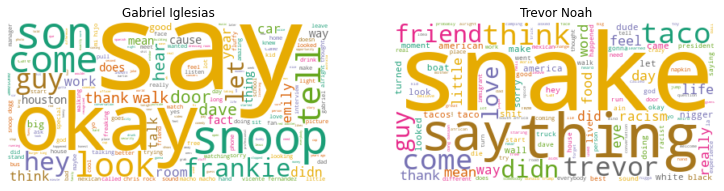

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [96, 16]

full_names = ['Gabriel Iglesias', 'Trevor Noah']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(1, 14, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Trevor Noah,1217
0,Gabriel Iglesias,1441


In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [90,63]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
0,Gabriel Iglesias,1441,4570,90,50.777778
1,Trevor Noah,1217,4337,63,68.841270


In [ ]:
pip install TextBlob

In [ ]:
data_clean

,transcript
gabriel,fluffyfluffy houston five four three two one macho macho man i’ve got to be a macho man macho macho man i’ve got to be a macho macho macho ...
trevor,a netflix original comedy special live nation presents trevor noah beautiful people put your hands together for trevor noah what’s going on l...


In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['transcript'].apply(pol)
data_clean['subjectivity'] = data_clean['transcript'].apply(sub)
data_clean

,transcript,polarity,subjectivity
gabriel,fluffyfluffy houston five four three two one macho macho man i’ve got to be a macho man macho macho man i’ve got to be a macho macho macho ...,0.137038,0.484957
trevor,a netflix original comedy special live nation presents trevor noah beautiful people put your hands together for trevor noah what’s going on l...,0.098991,0.476838


In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
gabriel,"[crowd chanting] Fluffy! Fluffy! [Fluffy shouts] Houston! [crowd cheering] [audience] Five, four, three, two, one! [cheering]\n♪ Macho, macho man ...",Gabriel Iglesias,0.131928,0.480376
trevor,"A NETFLIX ORIGINAL COMEDY SPECIAL [distant traffic] LIVE NATION PRESENTS TREVOR NOAH [presenter] Beautiful people, put your hands together for Tre...",Trevor Noah,0.096365,0.479900


In [ ]:

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data_clean.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' fluffyfluffy  houston   five four three two one  macho macho man i’ve got to be a macho man macho macho man  i’ve got to be a macho  macho macho man i’ve got to be a macho man macho macho man  i’ve got to be a macho  how are you   whoo oh man that’s a long walk  thank you so much houston  one year ago this city was flipped upside down by a hurricane un cabrón named harvey  and they said that this city would never be the same i think it’s beautiful that a year later we’re all here celebrating together the fact that this city is resilient and you guys persevered houston’s strong baby  that’s serious in all sincerity guys i’m not trying to kiss your ass i already got your money  freaking houston i love this town i’ve been coming here for  years twenty years started off performing at a comedy club called the last stop  and then of course we jumped over to the improv and then– i performed everywhere i even did a onenighter in tomball  that’s a long story for the people at home i won’t e

In [ ]:

# The list has 10 elements, one for each transcript
len(list_pieces)

2

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])


10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.14943103062821375,
  0.09920130931160344,
  0.1265596160944998,
  0.0762876984126984,
  0.16576446280991738,
  0.11241880576387615,
  0.09775618580765638,
  0.2186643217893218,
  0.14976525821596243,
  0.14257109557109557],
 [0.2149554628002905,
  0.0682220276602299,
  0.10651654235991594,
  0.2030248700429423,
  -0.017902494331065746,
  0.07594766344766345,
  -0.04604945054945055,
  0.15216262813665407,
  0.13314962814962816,
  0.03945619792393986]]

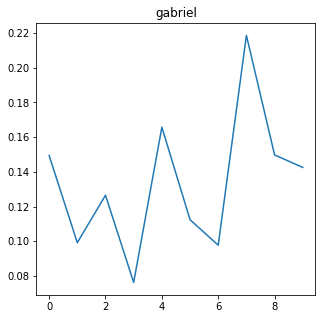

In [ ]:

# Show the plot for one comedian
plt.figure(figsize=(5,5))
plt.plot(polarity_transcript[0])
plt.title(data_clean['full_name'].index[0])
plt.show()

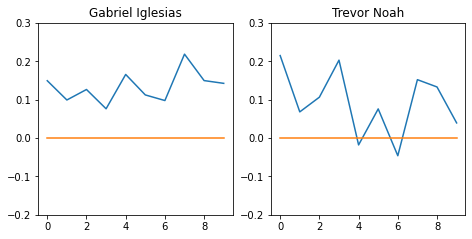

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data_clean.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data_clean['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()